In [1]:
from ALS.CP import solve_multiple_runways_cp,solve_single_runway_cp
from ALS.MIP import solve_multiple_runways_mip
from ALS.utils import read_data
from ALS.performanceCP import performance_CP
from ALS.performanceMIP import performance_MIP
from ALS.visualization import visualize_solution
from ortools.sat.python import cp_model
import pandas as pd 

In [ ]:
import ortools
print(ortools.__version__)


In [2]:
filename = "data/airland8.txt"

num_planes, planes_data, separation_times = read_data(filename)

num_runways = 2

	       Reading data from airland8.txt

-> Number of planes: 50 



In [3]:
decision_strategies_multiple = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    },
    {
        "variables": "runway",
        "variable_strategy": cp_model.CHOOSE_FIRST,      
        "value_strategy": cp_model.SELECT_MAX_VALUE      
    }
]


solver, mem_before, mem_after = solve_multiple_runways_cp(num_planes, num_runways, planes_data, separation_times)
metrics_CP_multiple_runway = performance_CP(solver, planes_data, mem_before, mem_after)

		     Creating CP model

-> Number of decision variables created: 2700
-> Number of constraints: 7651

			Solving CP

-> Optimal Cost: 135.0

-> Planes that did not land on the target time:
  -> Plane 2: 154 | Target Time: 160 | Penalty: 60.0
  -> Plane 8: 133 | Target Time: 132 | Penalty: 30.0
  -> Plane 16: 341 | Target Time: 338 | Penalty: 30.0
  -> Plane 34: 411 | Target Time: 412 | Penalty: 15.0

		Performance Metrics for CP

-> Execution time (s): 4.92
-> Solution Status: OPTIMAL
-> Memory usage (MB): 35.52
-> Number of Conflicts: 1999
-> Number of Branches: 149764
-> Best objective bound: 135.0



In [4]:
decision_strategies_single = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    }
]

solver, _,mem_before, mem_after = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single)
metrics_CP_single_runway = performance_CP(solver, planes_data, mem_before, mem_after)



		     Creating CP model

-> Number of decision variables created: 1425
-> Number of constraints: 5201

			Solving CP

-> Optimal Cost: 1950.0

-> Planes that did not land on the target time:
  -> Plane 2: 152 | Target Time: 160 | Penalty: 80.0
  -> Plane 3: 116 | Target Time: 117 | Penalty: 30.0
  -> Plane 5: 100 | Target Time: 106 | Penalty: 180.0
  -> Plane 8: 135 | Target Time: 132 | Penalty: 90.0
  -> Plane 9: 132 | Target Time: 130 | Penalty: 60.0
  -> Plane 11: 124 | Target Time: 126 | Penalty: 60.0
  -> Plane 12: 325 | Target Time: 336 | Penalty: 110.0
  -> Plane 15: 422 | Target Time: 409 | Penalty: 130.0
  -> Plane 16: 341 | Target Time: 338 | Penalty: 30.0
  -> Plane 19: 175 | Target Time: 169 | Penalty: 180.0
  -> Plane 20: 619 | Target Time: 628 | Penalty: 135.0
  -> Plane 24: 392 | Target Time: 398 | Penalty: 90.0
  -> Plane 26: 428 | Target Time: 426 | Penalty: 40.0
  -> Plane 28: 516 | Target Time: 521 | Penalty: 75.0
  -> Plane 30: 688 | Target Time: 674 | Penalty: 210

		     Creating CP model

-> Number of decision variables created: 1425
-> Number of constraints: 5201

			Solving CP

-> Optimal Cost: 1950.0

-> Planes that did not land on the target time:
  -> Plane 2: 152 | Target Time: 160 | Penalty: 80.0
  -> Plane 3: 116 | Target Time: 117 | Penalty: 30.0
  -> Plane 5: 100 | Target Time: 106 | Penalty: 180.0
  -> Plane 8: 135 | Target Time: 132 | Penalty: 90.0
  -> Plane 9: 132 | Target Time: 130 | Penalty: 60.0
  -> Plane 11: 124 | Target Time: 126 | Penalty: 60.0
  -> Plane 12: 325 | Target Time: 336 | Penalty: 110.0
  -> Plane 15: 422 | Target Time: 409 | Penalty: 130.0
  -> Plane 16: 341 | Target Time: 338 | Penalty: 30.0
  -> Plane 19: 175 | Target Time: 169 | Penalty: 180.0
  -> Plane 20: 619 | Target Time: 628 | Penalty: 135.0
  -> Plane 24: 392 | Target Time: 398 | Penalty: 90.0
  -> Plane 26: 428 | Target Time: 426 | Penalty: 40.0
  -> Plane 28: 516 | Target Time: 521 | Penalty: 75.0
  -> Plane 30: 688 | Target Time: 674 | Penalty: 210

AttributeError: 'IntVar' object has no attribute 'solution_value'

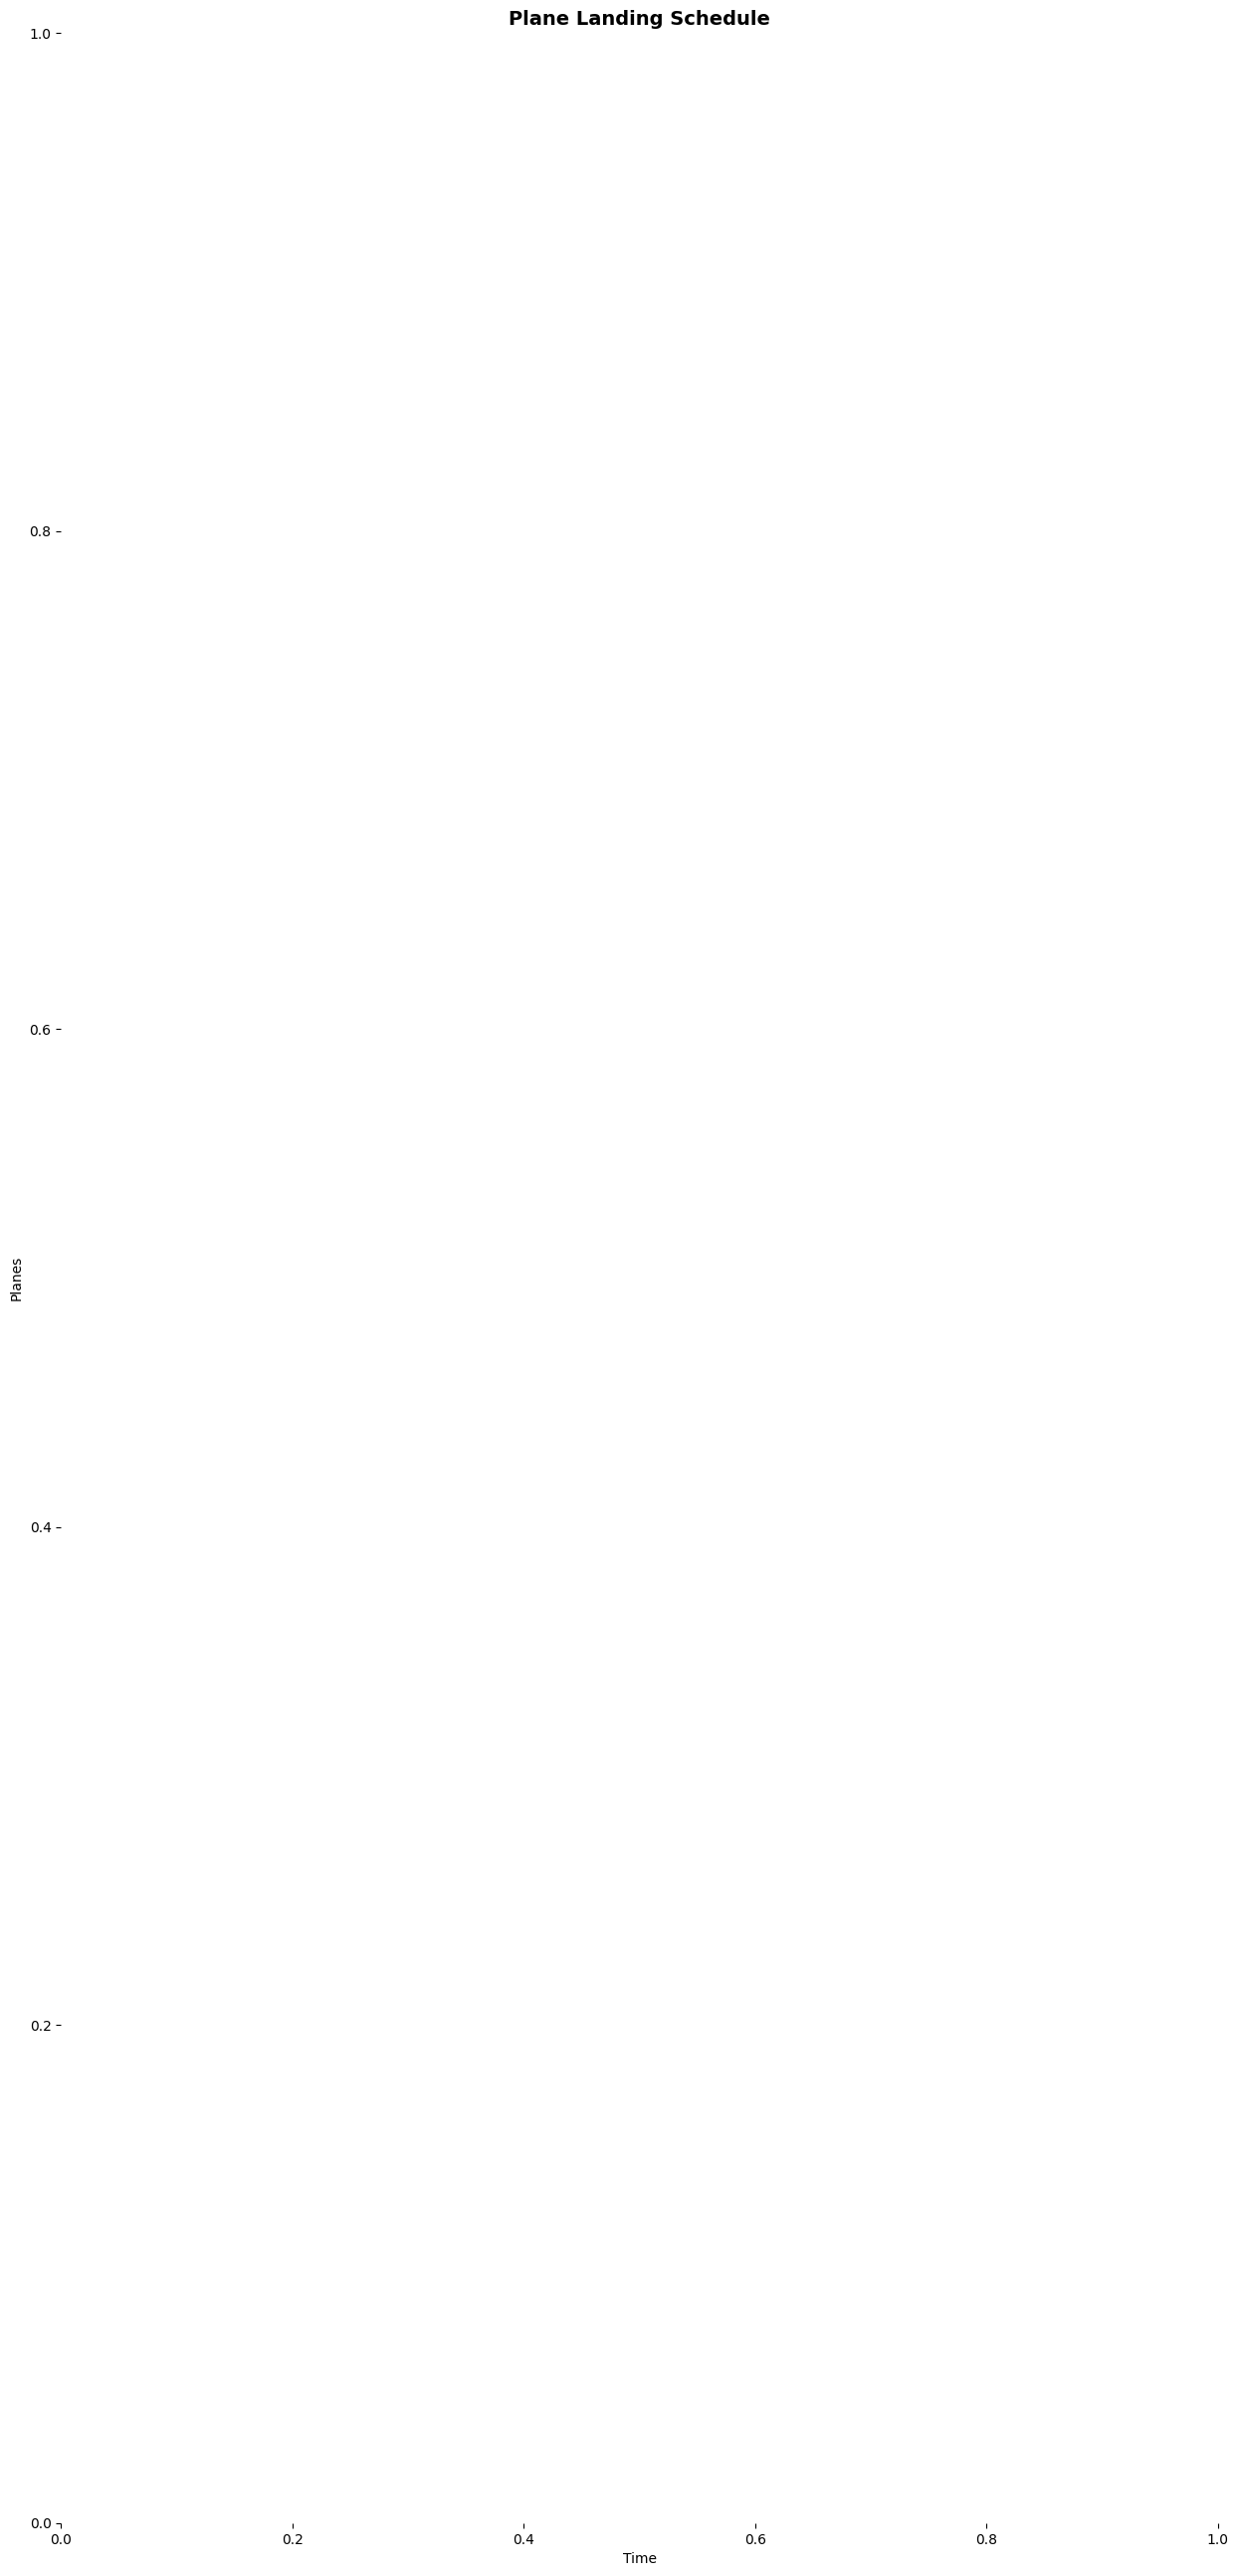

In [5]:
solver, variables, mem_before, mem_after = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single,hint=True)
metrics_CP_single_runway = performance_CP(solver, planes_data, mem_before, mem_after)

visualize_solution(num_planes, planes_data, variables)

In [ ]:
solver, variables, memory_before, memory_after = solve_multiple_runways_mip(num_planes, num_runways, planes_data, separation_times)
metrics_MIP_multiple_runway = performance_MIP(solver, mem_before, mem_after)

In [7]:
selected_variables = [
    "metrics_CP_single_runway",
    "metrics_CP_multiple_runway"
]

# Filtrar as variáveis selecionadas
variables = {var: globals()[var] for var in selected_variables}

# Criar o DataFrame
data = {
    "Model": list(variables.keys()),
    "Execution Time": [v[0] for v in variables.values()],
    "Status": [v[1] for v in variables.values()],
    "Memory Usage": [v[2] for v in variables.values()],
    "Number of Conflicts": [v[3] for v in variables.values()],
    "Number of Branches": [v[4] for v in variables.values()],
    "Best Objective Bound": [v[5] for v in variables.values()]
}

df = pd.DataFrame(data)

In [ ]:
df.head()